# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these). Done.
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
# use the groupby() function to create a Series of data that has the type of city as the index,
# then apply the count() method to the "ride_id" column.
total_rides_by_type_df = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type_df

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
# use the groupby() function to create a Series of data that has the type of city as the index,
# then apply the sum() method to the "driver_count" column.
total_drivers_by_type_df = pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type_df

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
# use the groupby() function to create a Series of data that has the type of city as the index,
# then apply the sum() method to the "fare" column.
total_fares_by_type_df = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_type_df

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
# calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
average_fare_by_type_df = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df.groupby(["type"]).count()["ride_id"]
average_fare_by_type_df

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
#  calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers.
average_fare_per_driver_by_type_df = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df.groupby(["type"]).sum()["driver_count"]
average_fare_per_driver_by_type_df

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
# create a PyBer summary DataFrame with all the data gathered from Steps 1-5.
# pd.concat([survey_sub, survey_sub_last10], axis=1)
df1 = pd.merge(total_rides_by_type_df, total_drivers_by_type_df, how="left", on=["type"])
print(df1)

df2 = pd.merge(df1, total_fares_by_type_df, how="left", on=["type"]) 
print(df2)

df3 = pd.concat((df2, average_fare_by_type_df), axis=1) 
print(df3)

pyber_summary_df = pd.concat((df3, average_fare_per_driver_by_type_df), axis=1)
print(pyber_summary_df)

pyber_summary_df = pyber_summary_df.rename(columns={"ride_id": "Total Rides", "driver_count": "Total Drivers", "fare": "Total Fares", "0": "Average Fare per Ride", "0": "Average Fare per Driver"})
print(pyber_summary_df)
    
# Changing columns name with index number
pyber_summary_df.columns.values[3] = "Average Fare per Ride"
pyber_summary_df.columns.values[4] = "Average Fare per Driver"
print(pyber_summary_df)

# Display the DataFrame
pyber_summary_df.head()

          ride_id  driver_count
type                           
Rural         125           537
Suburban      625          8570
Urban        1625         59602
          ride_id  driver_count      fare
type                                     
Rural         125           537   4327.93
Suburban      625          8570  19356.33
Urban        1625         59602  39854.38
          ride_id  driver_count      fare          0
type                                                
Rural         125           537   4327.93  34.623440
Suburban      625          8570  19356.33  30.970128
Urban        1625         59602  39854.38  24.525772
          ride_id  driver_count      fare          0         0
type                                                          
Rural         125           537   4327.93  34.623440  8.059460
Suburban      625          8570  19356.33  30.970128  2.258615
Urban        1625         59602  39854.38  24.525772  0.668675
          Total Rides  Total Drivers  Total Fares 

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [10]:
#  8. Format the columns.
pyber_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Rural to Urban
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Total Rides              3 non-null      int64  
 1   Total Drivers            3 non-null      int64  
 2   Total Fares              3 non-null      float64
 3   Average Fare per Ride    3 non-null      float64
 4   Average Fare per Driver  3 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 144.0+ bytes


In [11]:
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",34.623440,8.059460
Suburban,625,8570,"$19,356.33",30.970128,2.258615
Urban,1625,59602,"$39,854.38",24.525772,0.668675


In [12]:
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,8.059460
Suburban,625,8570,"$19,356.33",$30.97,2.258615
Urban,1625,59602,"$39,854.38",$24.53,0.668675


In [13]:
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


In [14]:
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,.0f}'.format)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,"1,625",59602,"$39,854.38",$24.53,$0.67


In [15]:
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,.0f}'.format)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [16]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [17]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_by_date_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
total_fare_by_date_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [18]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_by_date_df = total_fare_by_date_df.reset_index()
total_fare_by_date_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [21]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_total_fare_by_date_df = total_fare_by_date_df.pivot(index="date", columns="type", values="fare")
pivot_total_fare_by_date_df.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-05-07 20:05:15,NaN,NaN,24.20
2019-05-07 20:22:19,NaN,NaN,18.74
2019-05-07 20:40:29,NaN,24.89,NaN
2019-05-08 01:54:18,NaN,NaN,32.69
2019-05-08 02:31:25,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77


In [44]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.


In [45]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pivot_total_fare_by_date_df.index = pd.to_datetime(pivot_total_fare_by_date_df.index)

In [46]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_total_fare_by_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [47]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
total_fare_per_week_df = pivot_total_fare_by_date_df.resample("W").sum()
total_fare_per_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


NameError: name 'date' is not defined

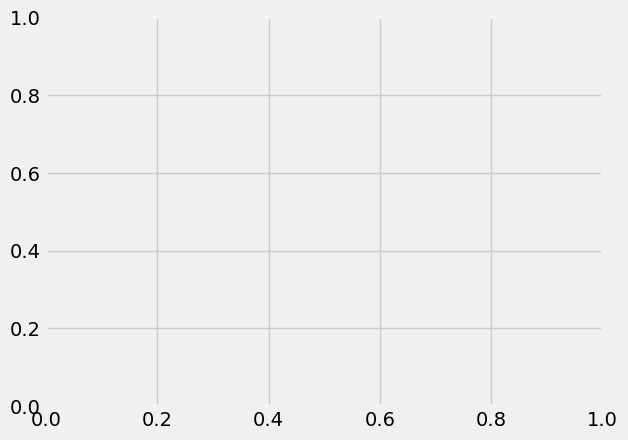

In [65]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots()
total_fare_per_week_df.plot(x=date, y=type, kind='line', figsize = (12,8))

# Create labels for the x and y axes.
plt.xlabel("Date")
plt.ylabel("Fare ($USD)")

# Create a title.
plt.title("Total Fare by City Type")

leg = ax.legend();

#Save as png
plt.savefig("analysis/PyBer_fare_summary.png")
